In [1]:
using Plots, LinearAlgebra, ForwardDiff

In [2]:
c=5

5

In [3]:
f(x) = norm(x) >= 1/c ? 1/c*norm(x)-1/(2*c) : 1/2 * norm(x)^2 #function f

f (generic function with 1 method)

In [4]:
function grad_f(x)
    if norm(x)>1/c                                  #calculate gradient
        return x/(c*norm(x))
    else
        return x
    end
end


grad_f (generic function with 1 method)

In [5]:
n=5000
x_0=rand(n)
x= copy(x_0)
println(f(x))

8.140883622994629


In [6]:
x_val = []
f_val = []
ep = 10^(-12)
push!(x_val,norm(x))
push!(f_val,f(x))
γ=1                                                  #lipschitz constant is 1
iter =0
for i in 1:200                                        #gradient method
    iter+=1
    x=x-γ*grad_f(x)
    push!(x_val,norm(x))
    push!(f_val,f(x))
end

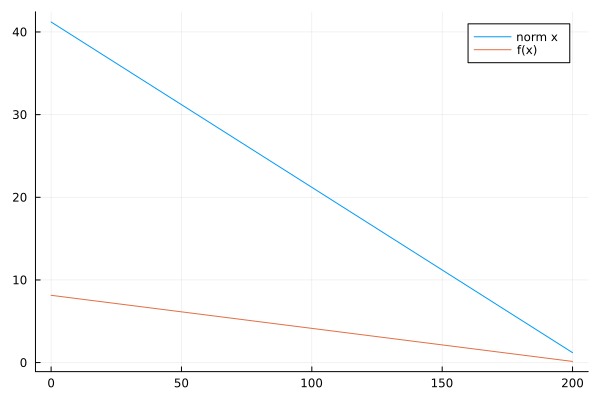

In [7]:
interval = collect(0:iter)
plot(interval,[x_val,f_val],label = ["norm x" "f(x)"])

In [8]:
x= copy(x_0)
x_val2 = []
f_val2 = []
ep = 10^(-12)
push!(x_val2,norm(x))
push!(f_val2,f(x))



x_prev = x
γ=1
iter =1
t=1
#t = (1 + sqrt(4*t^2+1))/2
for i in 2:200
    iter+=1                                                         #nesterov method
    t_prev = copy(t)
    t = (1 + sqrt(4*t^2+1))/2
    
    y = x + ((t-1)/t_prev) * (x-x_prev)
    
    x_prev = copy(x)
 
    
    x=y-γ*grad_f(y)
    push!(x_val2,norm(x))
    push!(f_val2,f(x))
 
    #println(t)

    
end

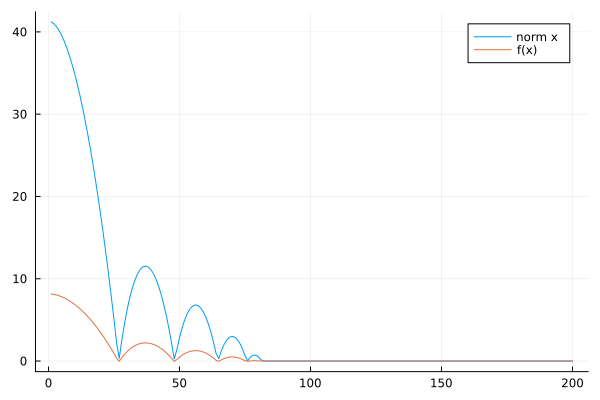

In [9]:
interval = collect(1:iter)
plot(interval,[x_val2,f_val2],label = ["norm x" "f(x)"])

In [10]:
println(f_val2)

Any[8.140883622994629, 8.100883622994624, 8.0313780107855, 7.9359329154654485, 7.816277777123161, 7.673410496515123, 7.5079709855392744, 7.320400020078795, 7.111017365112456, 6.880064309985693, 6.627728645405957, 6.354160215549007, 6.059481066499504, 5.743792327820353, 5.407179030914632, 5.049713575738922, 4.671458283966474, 4.272467317868235, 3.8527881483634725, 3.4124626959576516, 2.9515282299561103, 2.4700180861139507, 1.967962245895738, 1.4453878088464607, 0.9023193814060332, 0.33877939968652926, -0.03478839953151115, 0.41231532388360803, 0.8049314678537425, 1.145231160932911, 1.4351852165514267, 1.6765881394342768, 1.871078630280028, 2.0201571855829683, 2.125201273859405, 2.1874784788607737, 2.20815792871935, 2.1883202729885722, 2.1289664239173254, 2.0310252415471632, 1.8953603124458098, 1.7227759476334907, 1.5140225053943808, 1.2698011283180175, 0.9907679703987612, 0.6775379787949598, 0.33068828548556073, -0.04923874378058716, 0.18173276244126615, 0.4678477861373065, 0.7085779113

In [11]:
x= copy(x_0)
x_val3 = []
f_val3 = []
ep = 10^(-12)
push!(x_val3,norm(x))
push!(f_val3,f(x))

α=10

x_prev = x
γ=1
iter = 1
t=1
t_prev = 1
for i in 2:200
    iter+=1
                                                                    #chambolle method
    
    t_prev = copy(t)
    t= (i+α-2)/(α-1)
    
    y = x + ((t-1)/t_prev) * (x-x_prev)
    
    x_prev = copy(x)

    
    x=y-γ*grad_f(y)

    push!(x_val3,norm(x))
    push!(f_val3,f(x))
    #println(t)

    
end

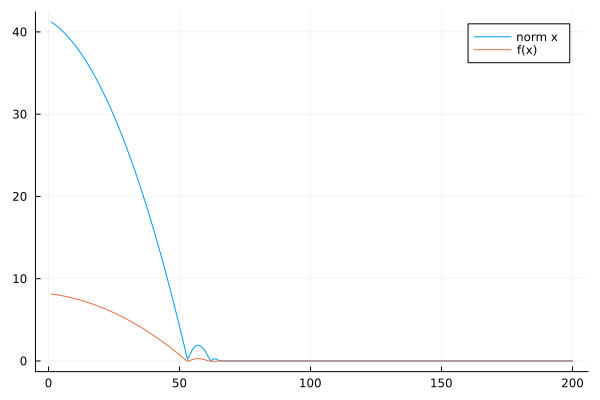

In [12]:
interval = collect(1:iter)
plot(interval,[x_val3,f_val3],label = ["norm x" "f(x)"])

In [13]:
function conjugate_gradient(A::AbstractMatrix, x,b::Array, eps::Float64)
    x_0=x
    g=A*x_0-b
    d=-g
    prev_g = copy(g)
    iter = 0
    while true
        if g'*g<eps
            return x_0,iter
        end
        iter+=1
        t = (g'*g)/ (d'*A*d)                                                #basic conjugate gradient
        x_0 = x_0 + t*d
        prev_g = copy(g)
        g = g + t*A*d
        β = (g'*g) / (prev_g'*prev_g)
        d = -g + β*d
    end
end

conjugate_gradient (generic function with 1 method)

In [14]:
A = [4 0; 0 2]
b = [4;2]
x = [5;-5]

sol, iter_count = conjugate_gradient(A,x,b,10^(-3))

([1.0, 1.0000000000000004], 2)

In [15]:
A\b                              #checking the solution 

2-element Vector{Float64}:
 1.0
 1.0

In [18]:
A1 = [2 0.3 0.01; 0.3 2*0.975 0; 0.01 0 2]
b1 = [-3; 4; -1]
x1 = [0; 0; 0]
sol1, iter_count1 = conjugate_gradient(A1,x1,b1,10^(-8))

([-1.8478819339864998, 2.3355715795876666, -0.4907605903300676], 3)

In [19]:
A1\b1

3-element Vector{Float64}:
 -1.8478819339864996
  2.3355715795876666
 -0.4907605903300675